# data scienc end of year part 4

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline


In [2]:
# importing the data sets for alone

df_alone_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv')
df_alone_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759796290435160Alone.csv')
df_alone_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv')
df_alone_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771082736601528Alone.csv')
df_alone_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770955999435879Alone.csv')
df_alone_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771047408504303Alone.csv')
df_alone_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759788383205274Alone.csv')
df_alone_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771061659067649Alone.csv')
df_alone_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760922573364655Alone.csv')

df_hand_right=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\HandRight.csv')

In [3]:
df_hand_right.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             4812 non-null   float64
 1    Frame ID        4812 non-null   int64  
 2    Hand Type       4812 non-null   object 
 3    # hands         4812 non-null   int64  
 4    Position X      4812 non-null   float64
 5    Position Y      4812 non-null   float64
 6    Position Z      4812 non-null   float64
 7    Velocity X      4812 non-null   float64
 8    Velocity Y      4812 non-null   float64
 9    Velocity Z      4812 non-null   float64
 10   Pitch           4812 non-null   float64
 11   Roll            4812 non-null   float64
 12   Yaw             4812 non-null   float64
 13   Wrist Pos X     4428 non-null   float64
 14   Wrist Pos Y     4428 non-null   float64
 15   Wrist Pos Z     4428 non-null   float64
 16   Elbow pos X     4428 non-null   float64
 17   Elbow Pos Y  

In [4]:
# creating a list to rename the columns for the right hand

columns_right=('Time_r','Frame ID_r','Hand Type_r','# hands_r','Position X_r','Position Y_r','Position Z_r','Velocity X_r','Velocity y_r',
               'Velocity Z_r','Pitch_r','Roll_r','Yaw_r','Wrist Pos X_r','Wrist Pos Y_r','Wrist Pos Z_r',
               'Elbow pos X_r','Elbow pos Y_r','Elbow pos Z_r','Grab Strenth_r','Grab Angle_r','Pinch Strength_r')

In [5]:
# changing the names for the columns in the right hand data frame

df_hand_right=df_hand_right.set_axis(columns_right, axis='columns') 
df_hand_right.head(1)

,Time_r,Frame ID_r,Hand Type_r,# hands_r,Position X_r,Position Y_r,Position Z_r,Velocity X_r,Velocity y_r,Velocity Z_r,...,Yaw_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,128.2883,15478,right,1,15.67167,226.2064,20.2647,34.26665,-195.2147,-35.04302,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0


In [6]:
# deleting rows with null values

df_alone_person1=df_alone_person1.dropna('index','any')
df_alone_person2=df_alone_person2.dropna('index','any')
df_alone_person3=df_alone_person3.dropna('index','any')
df_alone_person4=df_alone_person4.dropna('index','any')
df_alone_person5=df_alone_person5.dropna('index','any')
df_alone_person6=df_alone_person6.dropna('index','any')
df_alone_person7=df_alone_person7.dropna('index','any')
df_alone_person8=df_alone_person8.dropna('index','any')
df_alone_person9=df_alone_person9.dropna('index','any')
df_hand_right=df_hand_right.dropna('index','any')


In [7]:
# adding the right hand to the left
# so that on the left is the left hand and on the right is the right hand

df_alone_person1_combo=pd.concat([df_alone_person1,df_hand_right],axis=1,)
df_alone_person2_combo=pd.concat([df_alone_person2,df_hand_right],axis=1,)
df_alone_person3_combo=pd.concat([df_alone_person3,df_hand_right],axis=1,)
df_alone_person4_combo=pd.concat([df_alone_person4,df_hand_right],axis=1,)
df_alone_person5_combo=pd.concat([df_alone_person5,df_hand_right],axis=1,)
df_alone_person6_combo=pd.concat([df_alone_person6,df_hand_right],axis=1,)
df_alone_person7_combo=pd.concat([df_alone_person7,df_hand_right],axis=1,)
df_alone_person8_combo=pd.concat([df_alone_person8,df_hand_right],axis=1,)
df_alone_person9_combo=pd.concat([df_alone_person9,df_hand_right],axis=1,)

In [8]:
# making sure that all rows have 1 hand for the left and not zero hands 

df_alone_person1_combo=df_alone_person1_combo.loc[df_alone_person1_combo[' # hands']==1]
df_alone_person2_combo=df_alone_person2_combo.loc[df_alone_person2_combo[' # hands']==1]
df_alone_person3_combo=df_alone_person3_combo.loc[df_alone_person3_combo[' # hands']==1]
df_alone_person4_combo=df_alone_person4_combo.loc[df_alone_person4_combo[' # hands']==1]
df_alone_person5_combo=df_alone_person5_combo.loc[df_alone_person5_combo[' # hands']==1]
df_alone_person6_combo=df_alone_person6_combo.loc[df_alone_person6_combo[' # hands']==1]
df_alone_person7_combo=df_alone_person7_combo.loc[df_alone_person7_combo[' # hands']==1]
df_alone_person8_combo=df_alone_person8_combo.loc[df_alone_person8_combo[' # hands']==1]
df_alone_person9_combo=df_alone_person9_combo.loc[df_alone_person9_combo[' # hands']==1]

In [9]:
# adding a label

df_alone_person1_combo["type"]=0
df_alone_person2_combo["type"]=0
df_alone_person3_combo["type"]=0
df_alone_person4_combo["type"]=0
df_alone_person5_combo["type"]=0
df_alone_person6_combo["type"]=0
df_alone_person7_combo["type"]=0
df_alone_person8_combo["type"]=0
df_alone_person9_combo["type"]=0

In [10]:
# setting the time as the index

df_alone_person1_combo=df_alone_person1_combo.set_index('Time')
df_alone_person2_combo=df_alone_person2_combo.set_index('Time')
df_alone_person3_combo=df_alone_person3_combo.set_index('Time')
df_alone_person4_combo=df_alone_person4_combo.set_index('Time')
df_alone_person5_combo=df_alone_person5_combo.set_index('Time')
df_alone_person6_combo=df_alone_person6_combo.set_index('Time')
df_alone_person7_combo=df_alone_person7_combo.set_index('Time')
df_alone_person8_combo=df_alone_person8_combo.set_index('Time')
df_alone_person9_combo=df_alone_person9_combo.set_index('Time')

In [11]:
# removing all rows that contain null values

df_alone_person1_combo=df_alone_person1_combo.dropna('index','any')
df_alone_person2_combo=df_alone_person2_combo.dropna('index','any')
df_alone_person3_combo=df_alone_person3_combo.dropna('index','any')
df_alone_person4_combo=df_alone_person4_combo.dropna('index','any')
df_alone_person5_combo=df_alone_person5_combo.dropna('index','any')
df_alone_person6_combo=df_alone_person6_combo.dropna('index','any')
df_alone_person7_combo=df_alone_person7_combo.dropna('index','any')
df_alone_person8_combo=df_alone_person8_combo.dropna('index','any')
df_alone_person9_combo=df_alone_person9_combo.dropna('index','any')

In [12]:
# getting rid of the 7 first seconds

df_alone_person1_combo=df_alone_person1_combo.iloc[700:]
df_alone_person2_combo=df_alone_person2_combo.iloc[700:]
df_alone_person3_combo=df_alone_person3_combo.iloc[700:]
df_alone_person4_combo=df_alone_person4_combo.iloc[700:]
df_alone_person5_combo=df_alone_person5_combo.iloc[700:]
df_alone_person6_combo=df_alone_person6_combo.iloc[700:]
df_alone_person7_combo=df_alone_person7_combo.iloc[700:]
df_alone_person8_combo=df_alone_person8_combo.iloc[700:]
df_alone_person9_combo=df_alone_person9_combo.iloc[700:]

In [13]:
# importing the data sets for sync

df_sync_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv')
df_sync_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759797397919664Sync.csv')
df_sync_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv')
df_sync_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771084494502229Sync.csv')
df_sync_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770957894370062Sync.csv')
df_sync_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771046527112972Sync.csv')
df_sync_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759789526313406Sync.csv')
df_sync_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771060699529085Sync.csv')
df_sync_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760923490742912Sync.csv')

In [14]:
#seperating the left hand from the right hand

df_sync_person1_r=df_sync_person1.loc[df_sync_person1[' Hand Type']=="right"]
df_sync_person1_l=df_sync_person1.loc[df_sync_person1[' Hand Type']=="left"]
df_sync_person2_r=df_sync_person2.loc[df_sync_person2[' Hand Type']=="right"]
df_sync_person2_l=df_sync_person2.loc[df_sync_person2[' Hand Type']=="left"]
df_sync_person3_r=df_sync_person3.loc[df_sync_person3[' Hand Type']=="right"]
df_sync_person3_l=df_sync_person3.loc[df_sync_person3[' Hand Type']=="left"]
df_sync_person4_r=df_sync_person4.loc[df_sync_person4[' Hand Type']=="right"]
df_sync_person4_l=df_sync_person4.loc[df_sync_person4[' Hand Type']=="left"]
df_sync_person5_r=df_sync_person5.loc[df_sync_person5[' Hand Type']=="right"]
df_sync_person5_l=df_sync_person5.loc[df_sync_person5[' Hand Type']=="left"]
df_sync_person6_r=df_sync_person6.loc[df_sync_person6[' Hand Type']=="right"]
df_sync_person6_l=df_sync_person6.loc[df_sync_person6[' Hand Type']=="left"]
df_sync_person7_r=df_sync_person7.loc[df_sync_person7[' Hand Type']=="right"]
df_sync_person7_l=df_sync_person7.loc[df_sync_person7[' Hand Type']=="left"]
df_sync_person8_r=df_sync_person8.loc[df_sync_person8[' Hand Type']=="right"]
df_sync_person8_l=df_sync_person8.loc[df_sync_person8[' Hand Type']=="left"]
df_sync_person9_r=df_sync_person9.loc[df_sync_person9[' Hand Type']=="right"]
df_sync_person9_l=df_sync_person9.loc[df_sync_person9[' Hand Type']=="left"]


In [15]:
# changing the names of the right hand columns

df_sync_person1_r=df_sync_person1_r.set_axis(columns_right, axis='columns')
df_sync_person2_r=df_sync_person2_r.set_axis(columns_right, axis='columns')
df_sync_person3_r=df_sync_person3_r.set_axis(columns_right, axis='columns')
df_sync_person4_r=df_sync_person4_r.set_axis(columns_right, axis='columns')
df_sync_person5_r=df_sync_person5_r.set_axis(columns_right, axis='columns')
df_sync_person6_r=df_sync_person6_r.set_axis(columns_right, axis='columns')
df_sync_person7_r=df_sync_person7_r.set_axis(columns_right, axis='columns')
df_sync_person8_r=df_sync_person8_r.set_axis(columns_right, axis='columns')
df_sync_person9_r=df_sync_person9_r.set_axis(columns_right, axis='columns')

In [16]:
# setting the index to the time stamp to the left and right data frames

df_sync_person1_r=df_sync_person1_r.set_index('Time_r')
df_sync_person1_l=df_sync_person1_l.set_index('Time')
df_sync_person2_r=df_sync_person2_r.set_index('Time_r')
df_sync_person2_l=df_sync_person2_l.set_index('Time')
df_sync_person3_r=df_sync_person3_r.set_index('Time_r')
df_sync_person3_l=df_sync_person3_l.set_index('Time')
df_sync_person4_r=df_sync_person4_r.set_index('Time_r')
df_sync_person4_l=df_sync_person4_l.set_index('Time')
df_sync_person5_r=df_sync_person5_r.set_index('Time_r')
df_sync_person5_l=df_sync_person5_l.set_index('Time')
df_sync_person6_r=df_sync_person6_r.set_index('Time_r')
df_sync_person6_l=df_sync_person6_l.set_index('Time')
df_sync_person7_r=df_sync_person7_r.set_index('Time_r')
df_sync_person7_l=df_sync_person7_l.set_index('Time')
df_sync_person8_r=df_sync_person8_r.set_index('Time_r')
df_sync_person8_l=df_sync_person8_l.set_index('Time')
df_sync_person9_r=df_sync_person9_r.set_index('Time_r')
df_sync_person9_l=df_sync_person9_l.set_index('Time')

In [17]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_sync_person1_combo=pd.concat([df_sync_person1_l,df_sync_person1_r],axis=1,)
df_sync_person2_combo=pd.concat([df_sync_person2_l,df_sync_person2_r],axis=1,)
df_sync_person3_combo=pd.concat([df_sync_person3_l,df_sync_person3_r],axis=1,)
df_sync_person4_combo=pd.concat([df_sync_person4_l,df_sync_person4_r],axis=1,)
df_sync_person5_combo=pd.concat([df_sync_person5_l,df_sync_person5_r],axis=1,)
df_sync_person6_combo=pd.concat([df_sync_person6_l,df_sync_person6_r],axis=1,)
df_sync_person7_combo=pd.concat([df_sync_person7_l,df_sync_person7_r],axis=1,)
df_sync_person8_combo=pd.concat([df_sync_person8_l,df_sync_person8_r],axis=1,)
df_sync_person9_combo=pd.concat([df_sync_person9_l,df_sync_person9_r],axis=1,)

In [18]:
# only keeping the rows that have two hands

df_sync_person1_combo=df_sync_person1_combo.loc[df_sync_person1_combo[' # hands']==2]
df_sync_person2_combo=df_sync_person2_combo.loc[df_sync_person2_combo[' # hands']==2]
df_sync_person3_combo=df_sync_person3_combo.loc[df_sync_person3_combo[' # hands']==2]
df_sync_person4_combo=df_sync_person4_combo.loc[df_sync_person4_combo[' # hands']==2]
df_sync_person5_combo=df_sync_person5_combo.loc[df_sync_person5_combo[' # hands']==2]
df_sync_person6_combo=df_sync_person6_combo.loc[df_sync_person6_combo[' # hands']==2]
df_sync_person7_combo=df_sync_person7_combo.loc[df_sync_person7_combo[' # hands']==2]
df_sync_person8_combo=df_sync_person8_combo.loc[df_sync_person8_combo[' # hands']==2]
df_sync_person9_combo=df_sync_person9_combo.loc[df_sync_person9_combo[' # hands']==2]

In [19]:
# adding a label

df_sync_person1_combo["type"]=1
df_sync_person2_combo["type"]=1
df_sync_person3_combo["type"]=1
df_sync_person4_combo["type"]=1
df_sync_person5_combo["type"]=1
df_sync_person6_combo["type"]=1
df_sync_person7_combo["type"]=1
df_sync_person8_combo["type"]=1
df_sync_person9_combo["type"]=1

In [20]:
# getting rid of the 7 first seconds

df_sync_person1_combo=df_sync_person1_combo.iloc[700:]
df_sync_person2_combo=df_sync_person2_combo.iloc[700:]
df_sync_person3_combo=df_sync_person3_combo.iloc[700:]
df_sync_person4_combo=df_sync_person4_combo.iloc[700:]
df_sync_person5_combo=df_sync_person5_combo.iloc[700:]
df_sync_person6_combo=df_sync_person6_combo.iloc[700:]
df_sync_person7_combo=df_sync_person7_combo.iloc[700:]
df_sync_person8_combo=df_sync_person8_combo.iloc[700:]
df_sync_person9_combo=df_sync_person9_combo.iloc[700:]

In [21]:
# importing the data sets for spontanius

df_spontan_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv')
df_spontan_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759795182793299Spontan.csv')
df_spontan_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759804404113837Spontan.csv')
df_spontan_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771083605535985Spontan.csv')
df_spontan_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770957038873193Spontan.csv')
df_spontan_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771045591258071Spontan.csv')
df_spontan_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759787508979097Spontan.csv')
df_spontan_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771059544754823Spontan.csv')
df_spontan_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760921663075813Spontan.csv')

In [22]:
#seperating the left hand from the right hand

df_spontan_person1_r=df_spontan_person1.loc[df_spontan_person1[' Hand Type']=="right"]
df_spontan_person1_l=df_spontan_person1.loc[df_spontan_person1[' Hand Type']=="left"]
df_spontan_person2_r=df_spontan_person2.loc[df_spontan_person2[' Hand Type']=="right"]
df_spontan_person2_l=df_spontan_person2.loc[df_spontan_person2[' Hand Type']=="left"]
df_spontan_person3_r=df_spontan_person3.loc[df_spontan_person3[' Hand Type']=="right"]
df_spontan_person3_l=df_spontan_person3.loc[df_spontan_person3[' Hand Type']=="left"]
df_spontan_person4_r=df_spontan_person4.loc[df_spontan_person4[' Hand Type']=="right"]
df_spontan_person4_l=df_spontan_person4.loc[df_spontan_person4[' Hand Type']=="left"]
df_spontan_person5_r=df_spontan_person5.loc[df_spontan_person5[' Hand Type']=="right"]
df_spontan_person5_l=df_spontan_person5.loc[df_spontan_person5[' Hand Type']=="left"]
df_spontan_person6_r=df_spontan_person6.loc[df_spontan_person6[' Hand Type']=="right"]
df_spontan_person6_l=df_spontan_person6.loc[df_spontan_person6[' Hand Type']=="left"]
df_spontan_person7_r=df_spontan_person7.loc[df_spontan_person7[' Hand Type']=="right"]
df_spontan_person7_l=df_spontan_person7.loc[df_spontan_person7[' Hand Type']=="left"]
df_spontan_person8_r=df_spontan_person8.loc[df_spontan_person8[' Hand Type']=="right"]
df_spontan_person8_l=df_spontan_person8.loc[df_spontan_person8[' Hand Type']=="left"]
df_spontan_person9_r=df_spontan_person9.loc[df_spontan_person9[' Hand Type']=="right"]
df_spontan_person9_l=df_spontan_person9.loc[df_spontan_person9[' Hand Type']=="left"]



In [23]:
# changing the names of the right hand columns

df_spontan_person1_r=df_spontan_person1_r.set_axis(columns_right, axis='columns')
df_spontan_person2_r=df_spontan_person2_r.set_axis(columns_right, axis='columns')
df_spontan_person3_r=df_spontan_person3_r.set_axis(columns_right, axis='columns')
df_spontan_person4_r=df_spontan_person4_r.set_axis(columns_right, axis='columns')
df_spontan_person5_r=df_spontan_person5_r.set_axis(columns_right, axis='columns')
df_spontan_person6_r=df_spontan_person6_r.set_axis(columns_right, axis='columns')
df_spontan_person7_r=df_spontan_person7_r.set_axis(columns_right, axis='columns')
df_spontan_person8_r=df_spontan_person8_r.set_axis(columns_right, axis='columns')
df_spontan_person9_r=df_spontan_person9_r.set_axis(columns_right, axis='columns')


In [24]:
# setting the index to the time stamp to the left and right data frames

df_spontan_person1_r=df_spontan_person1_r.set_index('Time_r')
df_spontan_person1_l=df_spontan_person1_l.set_index('Time')
df_spontan_person2_r=df_spontan_person2_r.set_index('Time_r')
df_spontan_person2_l=df_spontan_person2_l.set_index('Time')
df_spontan_person3_r=df_spontan_person3_r.set_index('Time_r')
df_spontan_person3_l=df_spontan_person3_l.set_index('Time')
df_spontan_person4_r=df_spontan_person4_r.set_index('Time_r')
df_spontan_person4_l=df_spontan_person4_l.set_index('Time')
df_spontan_person5_r=df_spontan_person5_r.set_index('Time_r')
df_spontan_person5_l=df_spontan_person5_l.set_index('Time')
df_spontan_person6_r=df_spontan_person6_r.set_index('Time_r')
df_spontan_person6_l=df_spontan_person6_l.set_index('Time')
df_spontan_person7_r=df_spontan_person7_r.set_index('Time_r')
df_spontan_person7_l=df_spontan_person7_l.set_index('Time')
df_spontan_person8_r=df_spontan_person8_r.set_index('Time_r')
df_spontan_person8_l=df_spontan_person8_l.set_index('Time')
df_spontan_person9_r=df_spontan_person9_r.set_index('Time_r')
df_spontan_person9_l=df_spontan_person9_l.set_index('Time')

In [25]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_spontan_person1_combo=pd.concat([df_spontan_person1_l,df_spontan_person1_r],axis=1,)
df_spontan_person2_combo=pd.concat([df_spontan_person2_l,df_spontan_person2_r],axis=1,)
df_spontan_person3_combo=pd.concat([df_spontan_person3_l,df_spontan_person3_r],axis=1,)
df_spontan_person4_combo=pd.concat([df_spontan_person4_l,df_spontan_person4_r],axis=1,)
df_spontan_person5_combo=pd.concat([df_spontan_person5_l,df_spontan_person5_r],axis=1,)
df_spontan_person6_combo=pd.concat([df_spontan_person6_l,df_spontan_person6_r],axis=1,)
df_spontan_person7_combo=pd.concat([df_spontan_person7_l,df_spontan_person7_r],axis=1,)
df_spontan_person8_combo=pd.concat([df_spontan_person8_l,df_spontan_person8_r],axis=1,)
df_spontan_person9_combo=pd.concat([df_spontan_person9_l,df_spontan_person9_r],axis=1,)


In [26]:
# only keeping the rows that have two hands

df_spontan_person1_combo=df_spontan_person1_combo.loc[df_spontan_person1_combo[' # hands']==2]
df_spontan_person2_combo=df_spontan_person2_combo.loc[df_spontan_person2_combo[' # hands']==2]
df_spontan_person3_combo=df_spontan_person3_combo.loc[df_spontan_person3_combo[' # hands']==2]
df_spontan_person4_combo=df_spontan_person4_combo.loc[df_spontan_person4_combo[' # hands']==2]
df_spontan_person5_combo=df_spontan_person5_combo.loc[df_spontan_person5_combo[' # hands']==2]
df_spontan_person6_combo=df_spontan_person6_combo.loc[df_spontan_person6_combo[' # hands']==2]
df_spontan_person7_combo=df_spontan_person7_combo.loc[df_spontan_person7_combo[' # hands']==2]
df_spontan_person8_combo=df_spontan_person8_combo.loc[df_spontan_person8_combo[' # hands']==2]
df_spontan_person9_combo=df_spontan_person9_combo.loc[df_spontan_person9_combo[' # hands']==2]

In [27]:
# adding a label

df_spontan_person1_combo["type"]=2
df_spontan_person2_combo["type"]=2
df_spontan_person3_combo["type"]=2
df_spontan_person4_combo["type"]=2
df_spontan_person5_combo["type"]=2
df_spontan_person6_combo["type"]=2
df_spontan_person7_combo["type"]=2
df_spontan_person8_combo["type"]=2
df_spontan_person9_combo["type"]=2

In [28]:
# getting rid of the 7 first seconds

df_spontan_person1_combo=df_spontan_person1_combo.iloc[700:]
df_spontan_person2_combo=df_spontan_person2_combo.iloc[700:]
df_spontan_person3_combo=df_spontan_person3_combo.iloc[700:]
df_spontan_person4_combo=df_spontan_person4_combo.iloc[700:]
df_spontan_person5_combo=df_spontan_person5_combo.iloc[700:]
df_spontan_person6_combo=df_spontan_person6_combo.iloc[700:]
df_spontan_person7_combo=df_spontan_person7_combo.iloc[700:]
df_spontan_person8_combo=df_spontan_person8_combo.iloc[700:]
df_spontan_person9_combo=df_spontan_person9_combo.iloc[700:]


In [29]:
# combinig all the data frames of alone together

data1=pd.concat([df_alone_person1_combo,df_alone_person2_combo,df_alone_person3_combo,
                 df_alone_person5_combo,df_alone_person6_combo,df_alone_person7_combo,df_alone_person8_combo,
                df_alone_person9_combo],axis=0)
data1=data1.drop(['Time_r'], axis=1)
data1.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 22910 entries, 530.4075 to 764.5913
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         22910 non-null  float64
 1    Hand Type        22910 non-null  object 
 2    # hands          22910 non-null  float64
 3    Position X       22910 non-null  float64
 4    Position Y       22910 non-null  float64
 5    Position Z       22910 non-null  float64
 6    Velocity X       22910 non-null  float64
 7    Velocity Y       22910 non-null  float64
 8    Velocity Z       22910 non-null  float64
 9    Pitch            22910 non-null  float64
 10   Roll             22910 non-null  float64
 11   Yaw              22910 non-null  float64
 12   Wrist Pos X      22910 non-null  float64
 13   Wrist Pos Y      22910 non-null  float64
 14   Wrist Pos Z      22910 non-null  float64
 15   Elbow pos X      22910 non-null  float64
 16   Elbow Pos Y      22910 non-

In [30]:
# combinig all the data frames of sync together

data2=pd.concat([df_sync_person1_combo,df_sync_person2_combo,df_sync_person3_combo,df_sync_person5_combo,
                 df_sync_person5_combo,df_sync_person6_combo,df_sync_person7_combo,df_sync_person8_combo,
                df_sync_person9_combo],axis=0)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 30765 entries, 438.8282 to 856.3295
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         30765 non-null  float64
 1    Hand Type        30765 non-null  object 
 2    # hands          30765 non-null  float64
 3    Position X       30765 non-null  float64
 4    Position Y       30765 non-null  float64
 5    Position Z       30765 non-null  float64
 6    Velocity X       30765 non-null  float64
 7    Velocity Y       30765 non-null  float64
 8    Velocity Z       30765 non-null  float64
 9    Pitch            30765 non-null  float64
 10   Roll             30765 non-null  float64
 11   Yaw              30765 non-null  float64
 12   Wrist Pos X      30765 non-null  float64
 13   Wrist Pos Y      30765 non-null  float64
 14   Wrist Pos Z      30765 non-null  float64
 15   Elbow pos X      30765 non-null  float64
 16   Elbow Pos Y      30765 non-

In [31]:
# combinig all the data frames of spontan together

data3=pd.concat([df_spontan_person1_combo,df_spontan_person2_combo,df_spontan_person3_combo,
                 df_spontan_person5_combo,df_spontan_person6_combo,df_spontan_person7_combo,df_spontan_person8_combo,
                 df_spontan_person9_combo],axis=0)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 27645 entries, 347.5953 to 673.556
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         27645 non-null  float64
 1    Hand Type        27645 non-null  object 
 2    # hands          27645 non-null  float64
 3    Position X       27645 non-null  float64
 4    Position Y       27645 non-null  float64
 5    Position Z       27645 non-null  float64
 6    Velocity X       27645 non-null  float64
 7    Velocity Y       27645 non-null  float64
 8    Velocity Z       27645 non-null  float64
 9    Pitch            27645 non-null  float64
 10   Roll             27645 non-null  float64
 11   Yaw              27645 non-null  float64
 12   Wrist Pos X      27645 non-null  float64
 13   Wrist Pos Y      27645 non-null  float64
 14   Wrist Pos Z      27645 non-null  float64
 15   Elbow pos X      27645 non-null  float64
 16   Elbow Pos Y      27645 non-n

In [32]:
# combinig the 3 combined data frames together

data=pd.concat([data1,data2,data3],axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 81320 entries, 530.4075 to 673.556
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         81320 non-null  float64
 1    Hand Type        81320 non-null  object 
 2    # hands          81320 non-null  float64
 3    Position X       81320 non-null  float64
 4    Position Y       81320 non-null  float64
 5    Position Z       81320 non-null  float64
 6    Velocity X       81320 non-null  float64
 7    Velocity Y       81320 non-null  float64
 8    Velocity Z       81320 non-null  float64
 9    Pitch            81320 non-null  float64
 10   Roll             81320 non-null  float64
 11   Yaw              81320 non-null  float64
 12   Wrist Pos X      81320 non-null  float64
 13   Wrist Pos Y      81320 non-null  float64
 14   Wrist Pos Z      81320 non-null  float64
 15   Elbow pos X      81320 non-null  float64
 16   Elbow Pos Y      81320 non-n

In [33]:
df_alone_person4_combo=df_alone_person4_combo.drop(["Time_r"],axis=1)
data_test=pd.concat([df_spontan_person4_combo,df_sync_person4_combo,df_alone_person4_combo],axis=0)
data_test

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
389.1360,45413.0,left,2.0,-104.40990,143.3133,37.058830,19.786560,-17.05407,-13.05387,0.851009,...,188.203100,191.44080,58.93281,309.65760,8.328026,158.4209,0.00000,0.443353,0.0,2
389.1523,45415.0,left,2.0,-102.05790,141.7048,35.422230,171.120100,-110.72400,-114.05750,0.895714,...,189.418400,191.26710,59.14279,307.65700,6.198611,158.8858,0.00000,0.538904,0.0,2
389.1688,45417.0,left,2.0,-98.94480,140.1913,33.449820,173.356400,-90.94820,-113.73830,1.031188,...,190.749800,191.29880,59.52903,303.71730,2.089403,157.5189,0.00000,0.644362,0.0,2
389.1854,45419.0,left,2.0,-96.30121,138.4633,31.967110,73.029320,-12.20496,-58.61050,1.203247,...,191.443300,191.24630,59.37608,298.54250,-3.655754,152.4923,0.00000,0.733758,0.0,2
389.2020,45420.0,left,2.0,-95.28905,136.9270,31.623850,115.543900,-175.38360,-39.18546,1.283485,...,192.129600,191.69470,59.30669,296.23800,-6.216622,149.4191,0.01036,0.815052,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362.0327,42297.0,left,1.0,-73.76652,110.1308,9.200500,127.211900,81.92708,-394.78760,-0.224218,...,1.693034,105.98620,171.82360,-108.34840,-93.438240,319.8367,0.00000,0.133462,0.0,0
362.0492,42298.0,left,1.0,-72.02691,110.8349,5.740680,199.978100,80.94456,-397.72620,-0.205010,...,0.450534,104.88660,177.28050,-104.47600,-95.648410,327.4911,0.00000,0.100465,0.0,0
362.0658,42300.0,left,1.0,-71.72289,113.6011,-1.569741,7.495792,133.15640,-376.79970,0.325395,...,0.317466,103.76150,179.51640,-98.71099,-100.801100,328.2934,0.00000,0.202968,0.0,0
362.0826,42302.0,left,1.0,-72.97131,117.5510,-6.569828,-122.600600,312.69950,-248.86920,0.481161,...,0.433988,101.23320,179.47840,-94.49784,-108.061400,324.2915,0.00000,0.261246,0.0,0


In [34]:
data

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
530.4075,150957.0,left,1.0,-62.14016,176.4449,27.85700,162.50850,419.44440,-59.98780,1.958783,...,39.77090,197.3047,99.29434,171.1660,52.26681,287.7588,0.0,0.498644,0.0,0
530.4240,150959.0,left,1.0,-59.53389,182.9531,26.70363,165.68980,414.00870,-55.57027,1.957630,...,44.53930,202.0048,101.27940,172.6115,51.28829,287.5629,0.0,0.520795,0.0,0
530.4407,150961.0,left,1.0,-57.38616,190.9170,25.55918,119.61220,426.42210,-76.86320,1.957033,...,48.87646,204.2281,103.38490,173.7377,52.08905,290.6891,0.0,0.527123,0.0,0
530.4572,150963.0,left,1.0,-56.21503,198.0746,24.11986,82.99512,353.61020,-96.85542,1.968468,...,53.62828,206.4552,105.76730,174.1449,50.32234,292.6303,0.0,0.504663,0.0,0
530.4738,150965.0,left,1.0,-54.58284,203.6519,22.74486,48.61330,404.18000,-72.40993,1.982430,...,58.09599,208.3566,108.21800,175.0809,48.86516,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673.4224,52505.0,left,2.0,-93.01819,221.5837,37.95346,93.66040,-705.10900,-58.95358,1.390923,...,198.77440,148.9755,36.17215,429.8078,88.65751,136.2759,0.0,0.256132,0.0,2
673.4561,52509.0,left,2.0,-87.87977,207.0944,30.25084,161.30820,-332.78340,-239.55220,1.268201,...,198.76460,147.6285,30.82009,424.2537,67.32506,129.2876,0.0,0.275538,0.0,2
673.4894,52512.0,left,2.0,-81.66566,203.9826,24.04028,240.80950,-160.56200,-222.44420,1.124147,...,199.40050,147.6265,27.94176,413.8865,47.81111,132.7705,0.0,0.342347,0.0,2
673.5233,52516.0,left,2.0,-77.57621,198.9182,20.57973,127.00290,-218.65710,-80.40309,1.037299,...,200.46510,148.9561,25.42753,400.5782,31.01108,139.2796,0.0,0.448368,0.0,2


In [35]:
# getting rid of the column number of hands because each row has 2 hands

data=data.drop([' # hands'],axis=1)
data=data.drop(['# hands_r'],axis=1)
data_test=data_test.drop([' # hands'],axis=1)
data_test=data_test.drop(['# hands_r'],axis=1)


# changing the hand type, 0=left hand, 1=right hand

data[" Hand Type"]=0
data["Hand Type_r"]=1

data_test[" Hand Type"]=0
data_test["Hand Type_r"]=1

data

,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
530.4075,150957.0,0,-62.14016,176.4449,27.85700,162.50850,419.44440,-59.98780,1.958783,0.267320,...,39.77090,197.3047,99.29434,171.1660,52.26681,287.7588,0.0,0.498644,0.0,0
530.4240,150959.0,0,-59.53389,182.9531,26.70363,165.68980,414.00870,-55.57027,1.957630,0.271045,...,44.53930,202.0048,101.27940,172.6115,51.28829,287.5629,0.0,0.520795,0.0,0
530.4407,150961.0,0,-57.38616,190.9170,25.55918,119.61220,426.42210,-76.86320,1.957033,0.272688,...,48.87646,204.2281,103.38490,173.7377,52.08905,290.6891,0.0,0.527123,0.0,0
530.4572,150963.0,0,-56.21503,198.0746,24.11986,82.99512,353.61020,-96.85542,1.968468,0.253811,...,53.62828,206.4552,105.76730,174.1449,50.32234,292.6303,0.0,0.504663,0.0,0
530.4738,150965.0,0,-54.58284,203.6519,22.74486,48.61330,404.18000,-72.40993,1.982430,0.240629,...,58.09599,208.3566,108.21800,175.0809,48.86516,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673.4224,52505.0,0,-93.01819,221.5837,37.95346,93.66040,-705.10900,-58.95358,1.390923,1.208312,...,198.77440,148.9755,36.17215,429.8078,88.65751,136.2759,0.0,0.256132,0.0,2
673.4561,52509.0,0,-87.87977,207.0944,30.25084,161.30820,-332.78340,-239.55220,1.268201,1.078444,...,198.76460,147.6285,30.82009,424.2537,67.32506,129.2876,0.0,0.275538,0.0,2
673.4894,52512.0,0,-81.66566,203.9826,24.04028,240.80950,-160.56200,-222.44420,1.124147,0.938394,...,199.40050,147.6265,27.94176,413.8865,47.81111,132.7705,0.0,0.342347,0.0,2
673.5233,52516.0,0,-77.57621,198.9182,20.57973,127.00290,-218.65710,-80.40309,1.037299,0.911163,...,200.46510,148.9561,25.42753,400.5782,31.01108,139.2796,0.0,0.448368,0.0,2


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 81320 entries, 530.4075 to 673.556
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         81320 non-null  float64
 1    Hand Type        81320 non-null  int64  
 2    Position X       81320 non-null  float64
 3    Position Y       81320 non-null  float64
 4    Position Z       81320 non-null  float64
 5    Velocity X       81320 non-null  float64
 6    Velocity Y       81320 non-null  float64
 7    Velocity Z       81320 non-null  float64
 8    Pitch            81320 non-null  float64
 9    Roll             81320 non-null  float64
 10   Yaw              81320 non-null  float64
 11   Wrist Pos X      81320 non-null  float64
 12   Wrist Pos Y      81320 non-null  float64
 13   Wrist Pos Z      81320 non-null  float64
 14   Elbow pos X      81320 non-null  float64
 15   Elbow Pos Y      81320 non-null  float64
 16   Elbow Pos Z      81320 non-n

In [37]:
data.head()

,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
530.4075,150957.0,0,-62.14016,176.4449,27.85700,162.50850,419.4444,-59.98780,1.958783,0.267320,...,39.77090,197.3047,99.29434,171.1660,52.26681,287.7588,0.0,0.498644,0.0,0
530.4240,150959.0,0,-59.53389,182.9531,26.70363,165.68980,414.0087,-55.57027,1.957630,0.271045,...,44.53930,202.0048,101.27940,172.6115,51.28829,287.5629,0.0,0.520795,0.0,0
530.4407,150961.0,0,-57.38616,190.9170,25.55918,119.61220,426.4221,-76.86320,1.957033,0.272688,...,48.87646,204.2281,103.38490,173.7377,52.08905,290.6891,0.0,0.527123,0.0,0
530.4572,150963.0,0,-56.21503,198.0746,24.11986,82.99512,353.6102,-96.85542,1.968468,0.253811,...,53.62828,206.4552,105.76730,174.1449,50.32234,292.6303,0.0,0.504663,0.0,0
530.4738,150965.0,0,-54.58284,203.6519,22.74486,48.61330,404.1800,-72.40993,1.982430,0.240629,...,58.09599,208.3566,108.21800,175.0809,48.86516,294.4880,0.0,0.515524,0.0,0


## Visualization

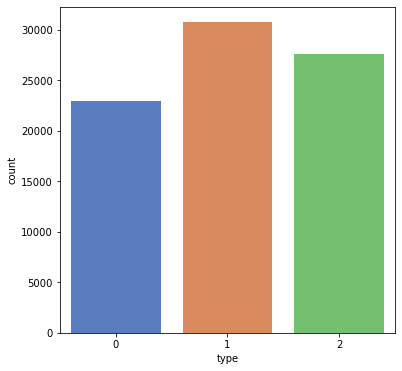

In [38]:
plt.figure(figsize=(6,6))

p = sns.countplot(x="type", data = data, palette="muted")
a=plt.setp(p.get_xticklabels(), rotation=0) 
# we can see that the data is split almodt a third, a third, a third, between the 3 types of data.

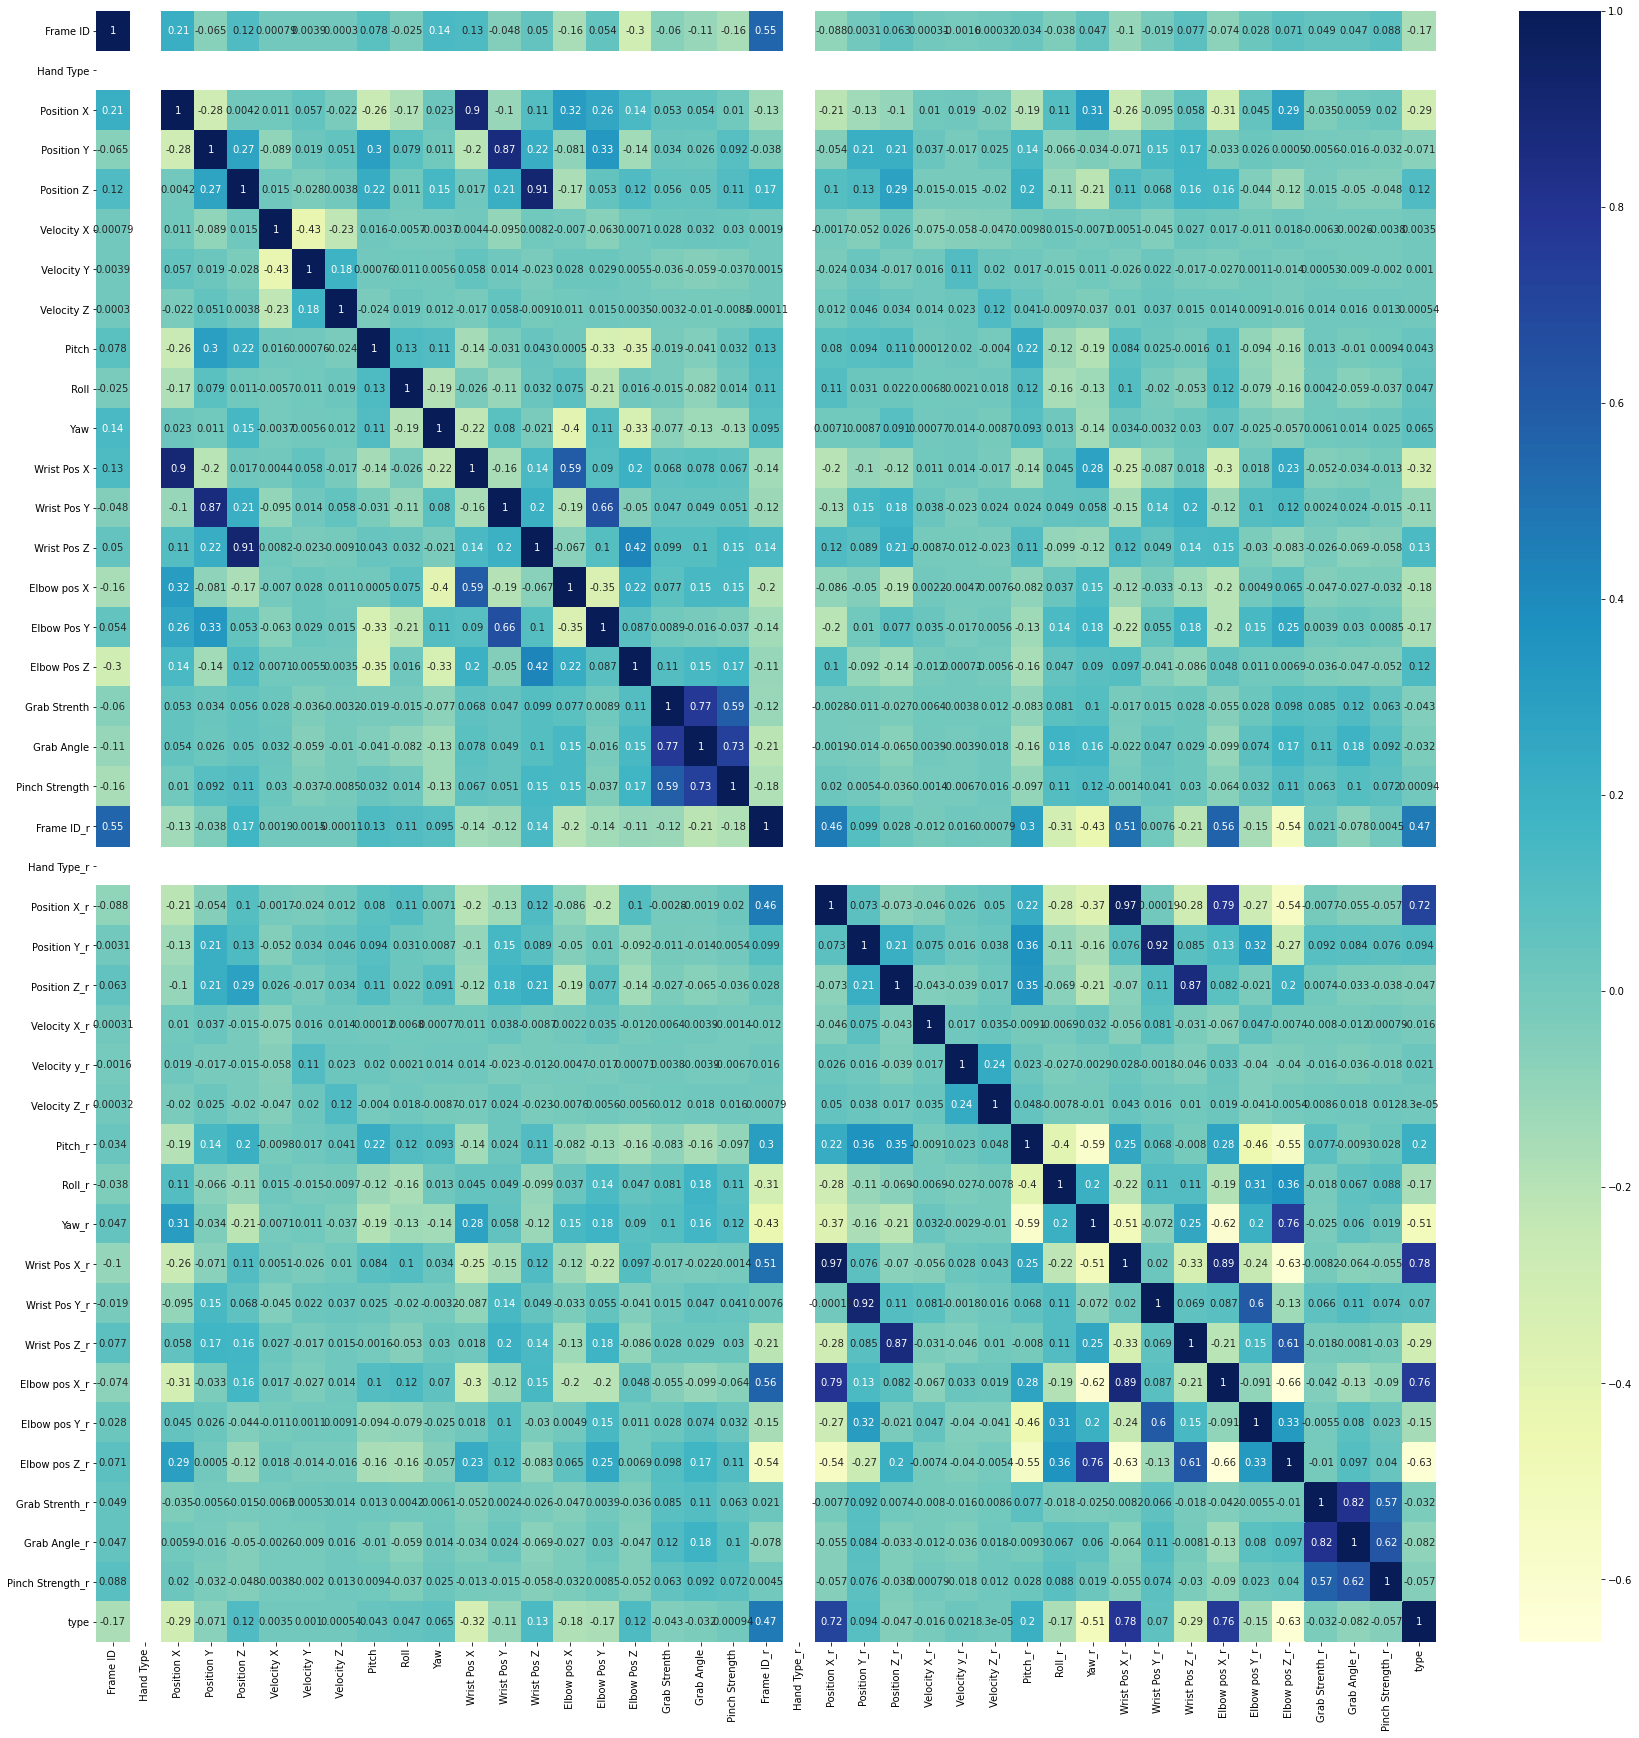

In [39]:
# corallation matrix between all of the columns

plt.figure(figsize=(30,30))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, cmap="YlGnBu",annot=True)
plt.show()

In [40]:
df_x=(data[" Position X"])
df_y=(data[" Position Y"])
df_z=(data[" Position Z"])
df_x_r=(data["Position X_r"])
df_y_r=(data["Position Y_r"])
df_z_r=(data["Position Z_r"])
colors=(data["type"])


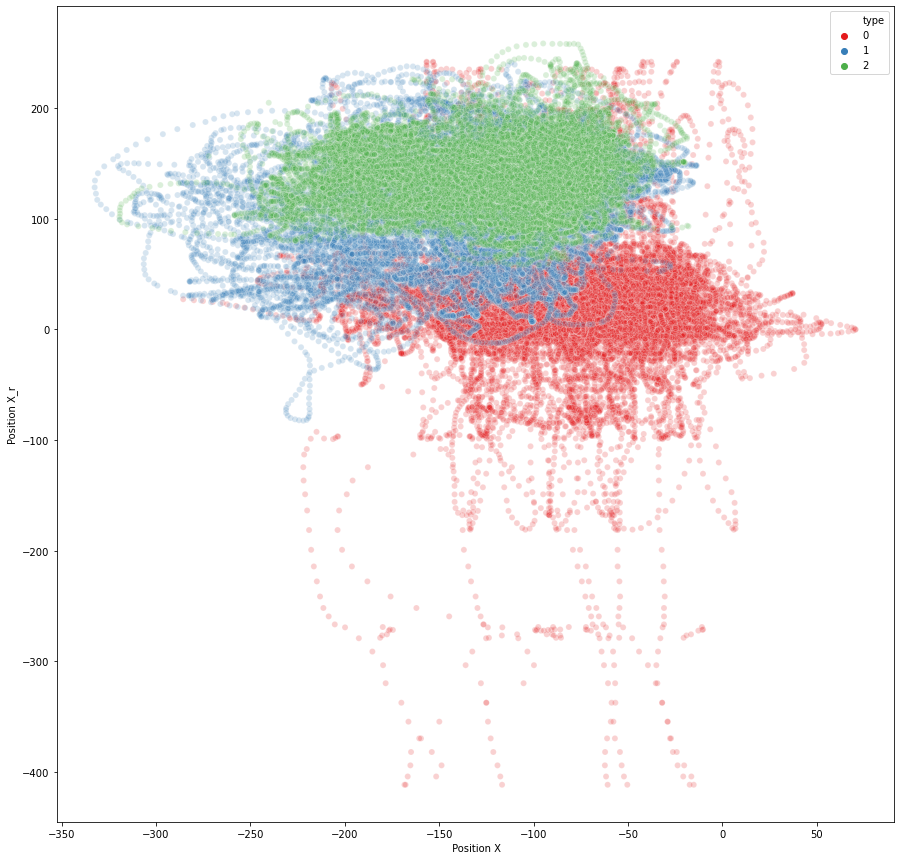

In [41]:
plt.figure(figsize=(15,15))
sns.scatterplot(df_x,df_x_r,hue=colors,palette='Set1',alpha=0.2)
# plot of the x axis for the right and left hand
# we can see that the spontan and sync are clustered together where the alone cluster (red) is more below.

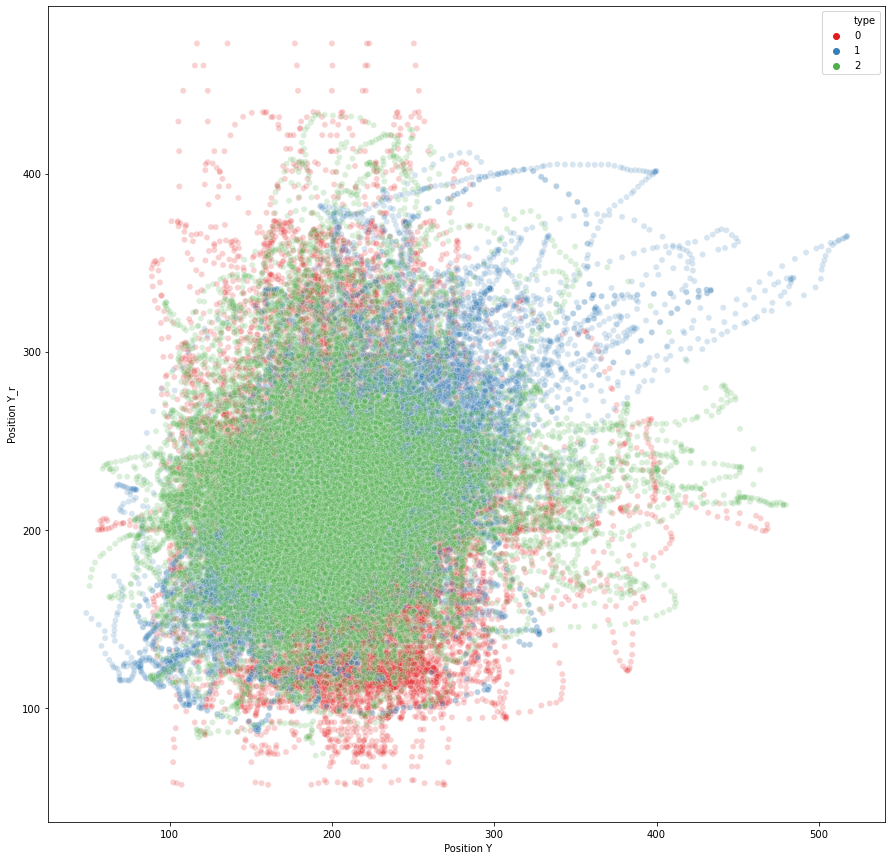

In [42]:
plt.figure(figsize=(15,15))
sns.scatterplot(df_y,df_y_r,hue=colors,palette='Set1',alpha=0.2)
# plot of the y axis for the right and left hand
# we can see that all the data is clustered together with more of the alone out of the cluster.
# also we can see that the sync data (blue) cluster is almost in a olpoid shape along the diagnal.

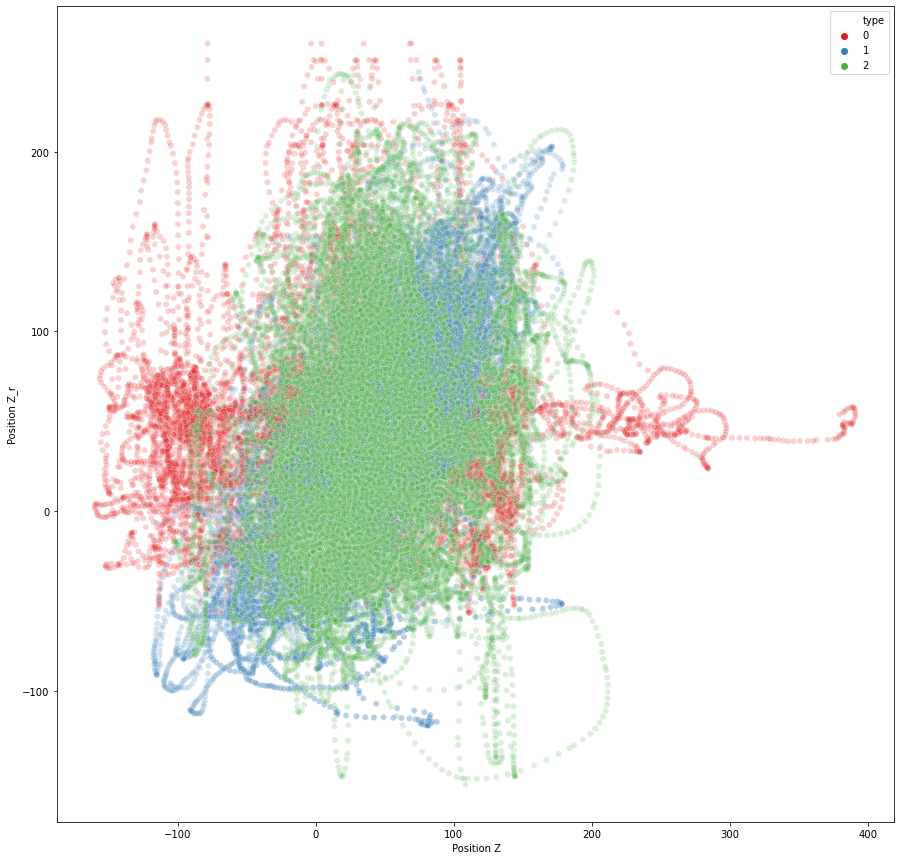

In [43]:
plt.figure(figsize=(15,15))
sns.scatterplot(df_z,df_z_r,hue=colors,palette='Set1',alpha=0.2)
# plot of the z axis for the right and left hand
# we can see that all the data is clustered together with more of the alone out of the cluster.
# also we can see that the sync data (blue) cluster is almost in a olpoid shape along the diagnal.

In [44]:
#shuffling the data so that it isn't all in order.
train_set=data.sample(frac=1)
test_set=data_test.sample(frac=1)

In [45]:
# changing the data to numpy array so that i can see the pictures, and split the data 

train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')

In [46]:
# dividing the data to x,y

train_set_x=train_set[:,0:40]
train_set_y=train_set[:,40]
test_set_x=test_set[:,0:40]
test_set_y=test_set[:,40]

## Training the models

In [47]:
# function to represent the confusion matrix nicely
def confussion_matrix(cf_matrix):
    plt.figure(figsize=(4,3))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Purples')

## KNN1

In [48]:
a=0
for x in range (3,70):
    knn1 = KNeighborsClassifier(n_neighbors=x)
    knn1.fit(train_set_x, train_set_y)
    y_pred_knn1=knn1.predict(test_set_x)
    accuracy_knn1=metrics.accuracy_score(test_set_y, y_pred_knn1)
    if(accuracy_knn1>a):
        a=accuracy_knn1
        print(x, accuracy_knn1)
    else: 
        print(x)

3 0.8297966793927017
4 0.8349462842937051
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34 0.8354790020420847
35
36 0.8360117197904644
37
38 0.8362780786646542
39
40 0.8364556512474474
41
42 0.8370771552872237
43
44 0.8376986593269999
45
46 0.8381425907839829
47
48 0.8388528811151558
49
50 0.8392080262807422
51
52
53
54 0.8402734617775015
55
56 0.8405398206516914
57
58 0.8408061795258812
59
60 0.8413388972742608
61
62 0.842226760188227
63
64 0.8425819053538134
65
66
67
68 0.8428482642280032
69


In [48]:
# using the result that is closest to 0.84 so that i wont over fit the model= knn 54
knn1 = KNeighborsClassifier(n_neighbors=54)
knn1.fit(train_set_x, train_set_y)
y_pred_knn1=knn1.predict(test_set_x)
accuracy_knn1=metrics.accuracy_score(test_set_y, y_pred_knn1)
accuracy_knn1

0.8402734617775015

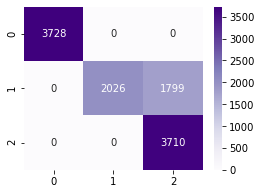

In [49]:
# confusion matrix
mat_knn1=confusion_matrix(test_set_y, y_pred_knn1)
confussion_matrix(mat_knn1)

In [50]:
# precision score, recall score, f1 score
print("precision_score_knn:",precision_score(test_set_y, y_pred_knn1,average='weighted')) 
print("recall_score_knn:",recall_score(test_set_y, y_pred_knn1,average='weighted'))
print("f1_score_knn:",f1_score(test_set_y, y_pred_knn1,average='weighted'))

precision_score_knn: 0.8924332080585462
recall_score_knn: 0.8402734617775015
f1_score_knn: 0.8313025534922863


In [51]:
cv_scores_knn1=cross_val_score(knn1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

[0.99145352 0.99139203 0.99163797 0.99176094 0.99256026] mean: 0.9917609444171175


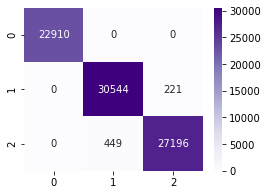

In [52]:
# confusion matrix
y_pred_knn1_c = cross_val_predict(knn1,  train_set_x, train_set_y, cv=5)
cofussion_knn1=confusion_matrix(train_set_y, y_pred_knn1_c)
confussion_matrix(cofussion_knn1)

In [53]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_knn1_c,average='weighted'))

precision_score: 0.9917789625011924
recall_score: 0.9917609444171176
f1_score: 0.9917590949248336


## XG

In [54]:
arr=np.arange(450,500,5)
arr

array([450, 455, 460, 465, 470, 475, 480, 485, 490, 495])

In [56]:
a=0
for x in arr:
    XG1=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG1.fit(train_set_x, train_set_y)
    y_pred_XG1=XG1.predict(test_set_x)
    accuracy_XG1=metrics.accuracy_score(test_set_y, y_pred_XG1)
    if (accuracy_XG1>a):
        a=accuracy_XG1
        print( x, a)
    else:
        print(x)

450 0.884844180058599
455 0.8862647607209447
460 0.8869750510521176
465 0.887330196217704
470 0.8896386397940158
475 0.8899937849596022
480
485 0.8915919382047411
490 0.8924798011187073
495 0.8925685874101039


In [55]:
# using the higest result thats below 89% so that i dont over fit my model
XG1=XGBClassifier(n_estimators=475, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss") 
XG1.fit(train_set_x, train_set_y)
y_pred_XG1=XG1.predict(test_set_x)
accuracy_XG1=metrics.accuracy_score(test_set_y, y_pred_XG1)
accuracy_XG1

0.8837787445618397

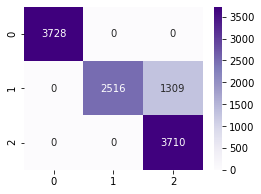

In [56]:
# confusion matrix
mat_XG1=confusion_matrix(test_set_y, y_pred_XG1)
confussion_matrix(mat_XG1)

In [57]:
# precision score, recall score, f1 score
print("precision_score_XG:",precision_score(test_set_y, y_pred_XG1,average='weighted')) 
print("recall_score_XG:",recall_score(test_set_y, y_pred_XG1,average='weighted'))
print("f1_score_XG:",f1_score(test_set_y, y_pred_XG1,average='weighted'))

precision_score_XG: 0.9140902853804393
recall_score_XG: 0.8837787445618397
f1_score_XG: 0.8804969809964682


In [58]:
# cross validation
cv_scores_XG1=cross_val_score(XG1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[1.         0.99993851 0.99993851 0.99993851 1.        ] mean: 0.9999631087063452


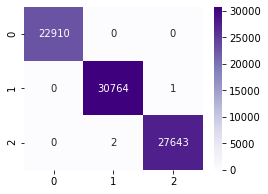

In [59]:
# confusion matrix
y_pred_XG1_c = cross_val_predict(XG1,  train_set_x, train_set_y, cv=5)
cofussion_XG1=confusion_matrix(train_set_y, y_pred_XG1_c)
confussion_matrix(cofussion_XG1)

In [60]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_XG1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_XG1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_XG1_c,average='weighted'))

precision_score: 0.9999631090609028
recall_score: 0.9999631087063453
f1_score: 0.999963108672501


## Random Forest

In [61]:
forest1= RandomForestClassifier(random_state=42)
forest1.fit(train_set_x, train_set_y)
y_pred_forest1=forest1.predict(test_set_x)
accuracy_forest1=metrics.accuracy_score(test_set_y, y_pred_forest1)
accuracy_forest1

0.8456894255526947

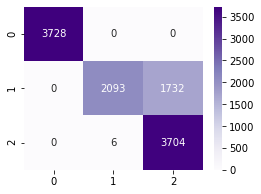

In [62]:
# confusion matrix
mat_forest1=confusion_matrix(test_set_y, y_pred_forest1)
confussion_matrix(mat_forest1)

In [63]:
# precision score, recall score, f1 score
print("precision_score_forest:",precision_score(test_set_y, y_pred_forest1,average='weighted')) 
print("recall_score_forset:",recall_score(test_set_y, y_pred_forest1,average='weighted'))
print("f1_score_forest:",f1_score(test_set_y, y_pred_forest1,average='weighted'))

precision_score_forest: 0.8940778234195661
recall_score_forset: 0.8456894255526947
f1_score_forest: 0.8377701441955557


In [64]:
# cross validation
cv_scores_forest1=cross_val_score(forest1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_forest1, "mean:", np.mean(cv_scores_forest1))

[1.         0.99981554 1.         0.99981554 1.        ] mean: 0.9999262174126906


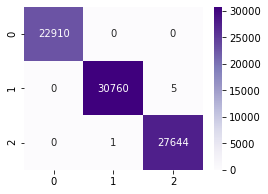

In [65]:
# confusion matrix
y_pred_forest1_c = cross_val_predict(forest1,  train_set_x, train_set_y, cv=5)
cofussion_forest1=confusion_matrix(train_set_y, y_pred_forest1_c)
confussion_matrix(cofussion_forest1)

In [66]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_forest1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_forest1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_forest1_c,average='weighted'))

precision_score: 0.9999262247087887
recall_score: 0.9999262174126906
f1_score: 0.9999262176830084


## Logistic Regression

In [67]:
lr1=LogisticRegression(random_state=42)
lr1.fit(train_set_x, train_set_y)
y_pred_lr1=lr1.predict(test_set_x)
accuracy_lr1=metrics.accuracy_score(test_set_y, y_pred_lr1)
accuracy_lr1

0.7976560419071296

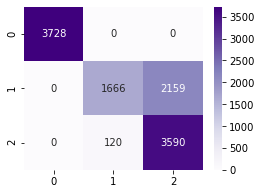

In [68]:
# confusion matrix
mat_lr1=confusion_matrix(test_set_y, y_pred_lr1)
confussion_matrix(mat_lr1)

In [69]:
# precision score, recall score, f1 score
print("precision_score_lr:",precision_score(test_set_y, y_pred_lr1,average='weighted')) 
print("recall_score_lr:",recall_score(test_set_y, y_pred_lr1,average='weighted'))
print("f1_score_lr:",f1_score(test_set_y, y_pred_lr1,average='weighted'))

precision_score_lr: 0.8534790433055475
recall_score_lr: 0.7976560419071296
f1_score_lr: 0.7826996429818986


In [70]:
# cross validation
cv_scores_lr1=cross_val_score(lr1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_lr1, "mean:", np.mean(cv_scores_lr1))

[0.83202164 0.8279636  0.82704132 0.82907034 0.82507378] mean: 0.8282341367437285


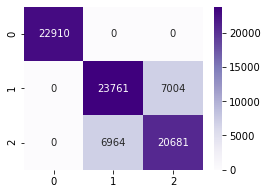

In [71]:
# confusion matrix
y_pred_lr1_c = cross_val_predict(lr1,  train_set_x, train_set_y, cv=5)
cofussion_lr1=confusion_matrix(train_set_y, y_pred_lr1_c)
confussion_matrix(cofussion_lr1)

In [72]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_lr1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_lr1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_lr1_c,average='weighted'))

precision_score: 0.8282470896042626
recall_score: 0.8282341367437285
f1_score: 0.828240356629386


 ## Adaboost

In [73]:
arr = np.arange(50,150,5)
arr

array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145])

In [81]:
count_ada=0
for x in arr:
        ada = AdaBoostClassifier(random_state=42, n_estimators=x,learning_rate=0.5)
        ada.fit(train_set_x, train_set_y)
        y_pred_ada = ada.predict(test_set_x)
        a_ada=metrics.accuracy_score(test_set_y, y_pred_ada)
        if a_ada>count_ada:
            count_ada=a_ada
            print(x, count_ada)
        else:
            print(x)

50 0.9329663499955607
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145


In [74]:
ada = AdaBoostClassifier(random_state=42, n_estimators=50,learning_rate=0.5)
ada.fit(train_set_x, train_set_y)
y_pred_ada = ada.predict(test_set_x)
accuracy_ada=metrics.accuracy_score(test_set_y, y_pred_ada)
accuracy_ada

0.9329663499955607

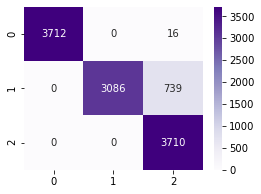

In [75]:
# confusion matrix
mat_ada=confusion_matrix(test_set_y, y_pred_ada)
confussion_matrix(mat_ada)

In [76]:
# precision score, recall score, f1 score
print("precision_score_ada:",precision_score(test_set_y, y_pred_ada,average='weighted')) 
print("recall_score_ada:",recall_score(test_set_y, y_pred_ada,average='weighted'))
print("f1_score_ada:",f1_score(test_set_y, y_pred_ada,average='weighted'))

precision_score_ada: 0.9443012672975432
recall_score_ada: 0.9329663499955607
f1_score_ada: 0.9325522252606453


In [77]:
# cross validation
cv_scores_ada=cross_val_score(ada, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_ada, "mean:", np.mean(cv_scores_ada))

[0.82851697 0.87930398 0.83995327 0.78295622 0.88711264] mean: 0.8435686178061979


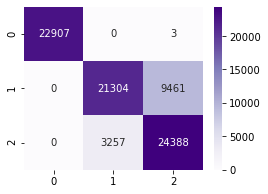

In [78]:
# confusion matrix
y_pred_ada_c = cross_val_predict(ada,  train_set_x, train_set_y, cv=5)
cofussion_ada=confusion_matrix(train_set_y, y_pred_ada_c)
confussion_matrix(cofussion_ada)

In [79]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_ada_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_ada_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_ada_c,average='weighted'))

precision_score: 0.8547907836187333
recall_score: 0.8435686178061977
f1_score: 0.8426943884359895


## Voting Classifier

In [80]:
vote1=VotingClassifier(estimators=[('knn1',knn1),('xg1',XG1),('forest1',forest1),('lr1',lr1),('ada',ada)],
                       voting='soft',weights=[0.2,0.6,0.2,0.2,0.3])
vote1.fit(train_set_x, train_set_y)
y_pred_vote1=vote1.predict(test_set_x)
accuracy_vote1=metrics.accuracy_score(test_set_y, y_pred_vote1)
accuracy_vote1

0.8634466838320163

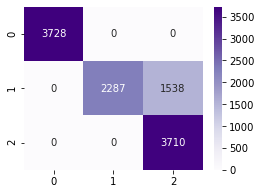

In [81]:
# confusion matrix
mat_vote1=confusion_matrix(test_set_y, y_pred_vote1)
confussion_matrix(mat_vote1)

In [82]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(test_set_y, y_pred_vote1,average='weighted')) 
print("recall_score_vote:",recall_score(test_set_y, y_pred_vote1,average='weighted'))
print("f1_score_vote:",f1_score(test_set_y, y_pred_vote1,average='weighted'))

precision_score_vote: 0.903465548212039
recall_score_vote: 0.8634466838320163
f1_score_vote: 0.8579882370149944


In [83]:
# cross validation
cv_scores_vote1=cross_val_score(vote1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_vote1, "mean:", np.mean(cv_scores_vote1))

[1.         0.99987703 0.99993851 0.99993851 1.        ] mean: 0.9999508116084603


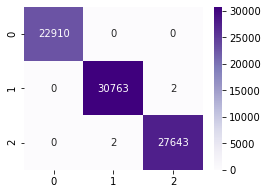

In [84]:
# confusion matrix
y_pred_vote1_c = cross_val_predict(vote1,  train_set_x, train_set_y, cv=5)
cofussion_vote1=confusion_matrix(train_set_y, y_pred_vote1_c)
confussion_matrix(cofussion_vote1)

In [85]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_vote1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_vote1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_vote1_c,average='weighted'))

precision_score: 0.9999508116084604
recall_score: 0.9999508116084604
f1_score: 0.9999508116084604


## Pipeline

In [86]:
def pipes (x,y):  
    pipe=Pipeline([('scaler', StandardScaler()),(x,y)])
    pipe.fit(train_set_x,train_set_y)
    y_pred=pipe.predict(test_set_x)
    acuracy_pipe=pipe.score(test_set_x,test_set_y)
    print(x,acuracy_pipe)
    
    # confusion matrix
    print(confusion_matrix(test_set_y, y_pred))
    
    # precision score, recall score, f1 score
    print("precision_score:",precision_score(test_set_y, y_pred,average='weighted')) 
    print("recall_score:",recall_score(test_set_y, y_pred,average='weighted'))
    print("f1_score:",f1_score(test_set_y, y_pred,average='weighted'))
    print()

In [87]:
classifiers=[LogisticRegression(random_state=42),
             RandomForestClassifier(random_state=42),
             AdaBoostClassifier(random_state=42, n_estimators=50,learning_rate=0.5),
             XGBClassifier(n_estimators=475, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss"),
             KNeighborsClassifier(n_neighbors=54),
             GradientBoostingClassifier()]
names=["lr","forest","ada","xg","knn","grb"]

In [88]:
count=0
while (count<6):
    pipes(names[count],classifiers[count])
    count=count+1

lr 0.8582082926396164
[[3728    0    0]
 [   0 2302 1523]
 [   0   74 3636]]
precision_score: 0.8921809254197964
recall_score: 0.8582082926396164
f1_score: 0.8532247444649157

forest 0.8456894255526947
[[3728    0    0]
 [   0 2093 1732]
 [   0    6 3704]]
precision_score: 0.8940778234195661
recall_score: 0.8456894255526947
f1_score: 0.8377701441955557

ada 0.9329663499955607
[[3712    0   16]
 [   0 3086  739]
 [   0    0 3710]]
precision_score: 0.9443012672975432
recall_score: 0.9329663499955607
f1_score: 0.9325522252606453

xg 0.8837787445618397
[[3728    0    0]
 [   0 2516 1309]
 [   0    0 3710]]
precision_score: 0.9140902853804393
recall_score: 0.8837787445618397
f1_score: 0.8804969809964682

knn 0.8376098730356033
[[3722    6    0]
 [   3 2765 1057]
 [   0  763 2947]]
precision_score: 0.8388784285053519
recall_score: 0.8376098730356033
f1_score: 0.8374783033077653

grb 0.8587410103879961
[[3698   30    0]
 [   0 2264 1561]
 [   0    0 3710]]
precision_score: 0.8980082024879118


In [89]:
# getting the classification from each pipeline on its own

pipe_xg=Pipeline([('scaler', StandardScaler()),('xg',XGBClassifier(n_estimators=475, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss"))])
pipe_xg.fit(train_set_x,train_set_y)
y_pred_pipe_xg=pipe_xg.predict(test_set_x)

pipe_ada=Pipeline([('scaler', StandardScaler()),('ada',AdaBoostClassifier(random_state=42, n_estimators=50,learning_rate=0.5))])
pipe_ada.fit(train_set_x,train_set_y)
y_pred_pipe_ada=pipe_ada.predict(test_set_x)                                                
                                                
pipe_knn=Pipeline([('scaler', StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=54))])
pipe_knn.fit(train_set_x,train_set_y)
y_pred_pipe_knn=pipe_knn.predict(test_set_x)

pipe_grb=Pipeline([('scaler', StandardScaler()),('grb',GradientBoostingClassifier())])
pipe_grb.fit(train_set_x,train_set_y)
y_pred_pipe_grb=pipe_grb.predict(test_set_x)

pipe_lr=Pipeline([('scaler', StandardScaler()),('lr',LogisticRegression(random_state=42))])
pipe_lr.fit(train_set_x,train_set_y)
y_pred_pipe_lr=pipe_lr.predict(test_set_x)


pipe_forest=Pipeline([('scaler', StandardScaler()),('forest',RandomForestClassifier(random_state=42))])
pipe_forest.fit(train_set_x,train_set_y)
y_pred_pipe_forest=pipe_forest.predict(test_set_x)



In [90]:
# changing the data type to int

y_pred_pipe_xg=y_pred_pipe_xg.astype(int)
y_pred_pipe_ada=y_pred_pipe_ada.astype(int)
y_pred_pipe_knn=y_pred_pipe_knn.astype(int)
y_pred_pipe_grb=y_pred_pipe_grb.astype(int)
y_pred_pipe_lr=y_pred_pipe_lr.astype(int)
y_pred_pipe_forest=y_pred_pipe_forest.astype(int)

In [91]:
# creating my own classifier,
# by looking at the confusiom metrix and seeing what each model is better at predicting,
# I am telling my classifier to follow the rules below and by that classify.
# and by doing so I am able to geta better results then most of the classifiers from the pipeline.
y_pred_my_classifier=[]
for x in range(0,11263):
    if (y_pred_pipe_xg[x]==0):
        y_pred_my_classifier.append(y_pred_pipe_xg[x])
  
    elif( y_pred_pipe_lr[x]==1 ):
        y_pred_my_classifier.append(y_pred_pipe_lr[x]) 
   
    elif( y_pred_pipe_ada[x]==1 ):
        y_pred_my_classifier.append(y_pred_pipe_ada[x])  
    
    else:
         y_pred_my_classifier.append(y_pred_pipe_knn[x]) 

In [92]:
accuracy_class=metrics.accuracy_score(test_set_y, y_pred_my_classifier)
accuracy_class

0.8900825712509989

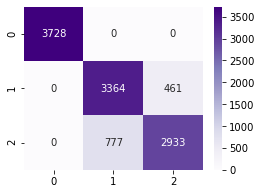

In [93]:
# confusion matrix
mat_class1=confusion_matrix(test_set_y, y_pred_my_classifier)
confussion_matrix(mat_class1)

In [94]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(test_set_y, y_pred_my_classifier,average='weighted')) 
print("recall_score:",recall_score(test_set_y, y_pred_my_classifier,average='weighted'))
print("f1_score:",f1_score(test_set_y, y_pred_my_classifier,average='weighted'))

precision_score: 0.8915361180870872
recall_score: 0.8900825712509989
f1_score: 0.8898180334990925


## Test data

In [95]:
# importing the test data for alone

df_test_alone_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770942529041679Alone.csv')
df_test_alone_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771066407626524Alone.csv')
df_test_alone_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754669540564461Alone.csv')
      
df_hand_right=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\HandRight.csv')

In [96]:
# changing the names for the columns in the right hand data frame

df_hand_right=df_hand_right.set_axis(columns_right, axis='columns') 

In [97]:
# deleting rows with null values

df_test_alone_person1=df_test_alone_person1.dropna('index','any')
df_test_alone_person2=df_test_alone_person2.dropna('index','any')
df_test_alone_person3=df_test_alone_person3.dropna('index','any')

In [98]:
# adding the right hand to the left

df_test_alone_person1_combo=pd.concat([df_test_alone_person1,df_hand_right],axis=1,)
df_test_alone_person2_combo=pd.concat([df_test_alone_person2,df_hand_right],axis=1,)
df_test_alone_person3_combo=pd.concat([df_test_alone_person3,df_hand_right],axis=1,)

In [99]:
# adding a label

df_test_alone_person1_combo["type"]=0
df_test_alone_person2_combo["type"]=0
df_test_alone_person3_combo["type"]=0

In [100]:
# setting the index to the time stamp

df_test_alone_person1_combo=df_test_alone_person1_combo.set_index('Time')
df_test_alone_person2_combo=df_test_alone_person2_combo.set_index('Time')
df_test_alone_person3_combo=df_test_alone_person3_combo.set_index('Time')

In [101]:
# getting rid of any rows with nulls

df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')
df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')
df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')

In [102]:
# getting rid of the 7 first secounds

df_test_alone_person1_combo=df_test_alone_person1_combo.iloc[700:]
df_test_alone_person2_combo=df_test_alone_person2_combo.iloc[700:]
df_test_alone_person3_combo=df_test_alone_person3_combo.iloc[700:]

In [103]:
# importing the test data for sync

df_test_sync_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770941638547912Sync.csv')
df_test_sync_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771065531910215Sync.csv')
df_test_sync_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754671560850581Sync.csv')

In [104]:
# seperating the left hand from the right hand

df_test_sync_person1_r=df_test_sync_person1.loc[df_test_sync_person1[' Hand Type']=="right"]
df_test_sync_person2_r=df_test_sync_person2.loc[df_test_sync_person2[' Hand Type']=="right"]
df_test_sync_person3_r=df_test_sync_person3.loc[df_test_sync_person3[' Hand Type']=="right"]
df_test_sync_person1_l=df_test_sync_person1.loc[df_test_sync_person1[' Hand Type']=="left"]
df_test_sync_person2_l=df_test_sync_person2.loc[df_test_sync_person2[' Hand Type']=="left"]
df_test_sync_person3_l=df_test_sync_person3.loc[df_test_sync_person3[' Hand Type']=="left"]

In [105]:
# changing the names for the columns in the right hand data frame

df_test_sync_person1_r=df_test_sync_person1_r.set_axis(columns_right, axis='columns')
df_test_sync_person2_r=df_test_sync_person2_r.set_axis(columns_right, axis='columns')
df_test_sync_person3_r=df_test_sync_person3_r.set_axis(columns_right, axis='columns')

In [106]:
# setting the index to the time stamp

df_test_sync_person1_r=df_test_sync_person1_r.set_index('Time_r')
df_test_sync_person2_r=df_test_sync_person2_r.set_index('Time_r')
df_test_sync_person3_r=df_test_sync_person3_r.set_index('Time_r')
df_test_sync_person1_l=df_test_sync_person1_l.set_index('Time')
df_test_sync_person2_l=df_test_sync_person2_l.set_index('Time')
df_test_sync_person3_l=df_test_sync_person3_l.set_index('Time')

In [107]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_test_sync_person1_combo=pd.concat([df_test_sync_person1_l,df_test_sync_person1_r],axis=1)
df_test_sync_person2_combo=pd.concat([df_test_sync_person2_l,df_test_sync_person2_r],axis=1)
df_test_sync_person3_combo=pd.concat([df_test_sync_person3_l,df_test_sync_person3_r],axis=1)

In [108]:
# only keeping the rows that have two hands

df_test_sync_person1_combo=df_test_sync_person1_combo.loc[df_test_sync_person1_combo[' # hands']==2]
df_test_sync_person2_combo=df_test_sync_person2_combo.loc[df_test_sync_person2_combo[' # hands']==2]
df_test_sync_person3_combo=df_test_sync_person3_combo.loc[df_test_sync_person3_combo[' # hands']==2]

In [109]:
# adding a laybel

df_test_sync_person1_combo["type"]=1
df_test_sync_person2_combo["type"]=1
df_test_sync_person3_combo["type"]=1

In [110]:
# getting rid of the 7 first secounds

df_test_sync_person1_combo=df_test_sync_person1_combo.iloc[700:]
df_test_sync_person2_combo=df_test_sync_person2_combo.iloc[700:]
df_test_sync_person3_combo=df_test_sync_person3_combo.iloc[700:]

In [111]:
# importing the test data for spontan

df_test_spontan_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770940701219076Spontan.csv')
df_test_spontan_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771064635567065Spontan.csv')
df_test_spontan_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754670490266956Spontan.csv')

In [112]:
# seperating the left hand from the right hand

df_test_spontan_person1_r=df_test_spontan_person1.loc[df_test_spontan_person1[' Hand Type']=="right"]
df_test_spontan_person2_r=df_test_spontan_person2.loc[df_test_spontan_person2[' Hand Type']=="right"]
df_test_spontan_person3_r=df_test_spontan_person3.loc[df_test_spontan_person3[' Hand Type']=="right"]
df_test_spontan_person1_l=df_test_spontan_person1.loc[df_test_spontan_person1[' Hand Type']=="left"]
df_test_spontan_person2_l=df_test_spontan_person2.loc[df_test_spontan_person2[' Hand Type']=="left"]
df_test_spontan_person3_l=df_test_spontan_person3.loc[df_test_spontan_person3[' Hand Type']=="left"]

In [113]:
# changing the names for the columns in the right hand data frame

df_test_spontan_person1_r=df_test_spontan_person1_r.set_axis(columns_right,axis='columns')
df_test_spontan_person2_r=df_test_spontan_person2_r.set_axis(columns_right,axis='columns')
df_test_spontan_person3_r=df_test_spontan_person3_r.set_axis(columns_right,axis='columns')

In [114]:
# setting the index to the time stamp

df_test_spontan_person1_r=df_test_spontan_person1_r.set_index('Time_r')
df_test_spontan_person2_r=df_test_spontan_person2_r.set_index('Time_r')
df_test_spontan_person3_r=df_test_spontan_person3_r.set_index('Time_r')
df_test_spontan_person1_l=df_test_spontan_person1_l.set_index('Time')
df_test_spontan_person2_l=df_test_spontan_person2_l.set_index('Time')
df_test_spontan_person3_l=df_test_spontan_person3_l.set_index('Time')

In [115]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_test_spontan_person1_combo=pd.concat([df_test_spontan_person1_l,df_test_spontan_person1_r],axis=1)
df_test_spontan_person2_combo=pd.concat([df_test_spontan_person2_l,df_test_spontan_person2_r],axis=1)
df_test_spontan_person3_combo=pd.concat([df_test_spontan_person3_l,df_test_spontan_person3_r],axis=1)

In [116]:
# only keeping the rows that have two hands

df_test_spontan_person1_combo=df_test_spontan_person1_combo.loc[df_test_spontan_person1_combo[" # hands"]==2]
df_test_spontan_person2_combo=df_test_spontan_person2_combo.loc[df_test_spontan_person2_combo[" # hands"]==2]
df_test_spontan_person3_combo=df_test_spontan_person3_combo.loc[df_test_spontan_person3_combo[" # hands"]==2]

In [117]:
# adding a label

df_test_spontan_person1_combo["type"]=2
df_test_spontan_person2_combo["type"]=2
df_test_spontan_person3_combo["type"]=2

In [118]:
# getting rid of the 7 first secounds

df_test_spontan_person1_combo=df_test_spontan_person1_combo.iloc[700:]
df_test_spontan_person2_combo=df_test_spontan_person2_combo.iloc[700:]
df_test_spontan_person3_combo=df_test_spontan_person3_combo.iloc[700:]

In [119]:
# combining each type of data togeter into new data frames

data_test1=pd.concat([df_test_alone_person1_combo,df_test_alone_person1_combo,df_test_alone_person1_combo],axis=0)
data_test2=pd.concat([df_test_sync_person1_combo,df_test_sync_person2_combo,df_test_sync_person3_combo],axis=0)
data_test3=pd.concat([df_test_spontan_person1_combo,df_test_spontan_person2_combo,df_test_spontan_person3_combo],axis=0)

In [120]:
# getting rid of the column "Time_r" in the alone data frame (the others dont have that column)

data_test1=data_test1.drop(['Time_r'],axis=1)
data_test1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11184 entries, 966.6613 to 1025.529
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         11184 non-null  float64
 1    Hand Type        11184 non-null  object 
 2    # hands          11184 non-null  float64
 3    Position X       11184 non-null  float64
 4    Position Y       11184 non-null  float64
 5    Position Z       11184 non-null  float64
 6    Velocity X       11184 non-null  float64
 7    Velocity Y       11184 non-null  float64
 8    Velocity Z       11184 non-null  float64
 9    Pitch            11184 non-null  float64
 10   Roll             11184 non-null  float64
 11   Yaw              11184 non-null  float64
 12   Wrist Pos X      11184 non-null  float64
 13   Wrist Pos Y      11184 non-null  float64
 14   Wrist Pos Z      11184 non-null  float64
 15   Elbow pos X      11184 non-null  float64
 16   Elbow Pos Y      11184 non-

In [121]:
# combining the 3 data frames into 1 data frame

data_test=pd.concat([data_test1,data_test2,data_test3],axis=0)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29153 entries, 966.6613 to 891.8492
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         29153 non-null  float64
 1    Hand Type        29153 non-null  object 
 2    # hands          29153 non-null  float64
 3    Position X       29153 non-null  float64
 4    Position Y       29153 non-null  float64
 5    Position Z       29153 non-null  float64
 6    Velocity X       29153 non-null  float64
 7    Velocity Y       29153 non-null  float64
 8    Velocity Z       29153 non-null  float64
 9    Pitch            29153 non-null  float64
 10   Roll             29153 non-null  float64
 11   Yaw              29153 non-null  float64
 12   Wrist Pos X      29153 non-null  float64
 13   Wrist Pos Y      29153 non-null  float64
 14   Wrist Pos Z      29153 non-null  float64
 15   Elbow pos X      29153 non-null  float64
 16   Elbow Pos Y      29153 non-

In [122]:
data_test

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
966.6613,112701.0,left,1.0,-89.46551,282.5517,104.14670,59.477310,-222.84010,114.072300,2.621086,...,39.77090,197.3047,99.29434,171.1660,52.266810,287.7588,0.0,0.498644,0.0,0
966.6778,112703.0,left,1.0,-89.09656,278.4751,105.77440,-13.318180,-215.47790,72.303980,2.666370,...,44.53930,202.0048,101.27940,172.6115,51.288290,287.5629,0.0,0.520795,0.0,0
966.6948,112705.0,left,1.0,-88.56313,274.1503,106.46620,54.813290,-279.77750,22.959880,2.720711,...,48.87646,204.2281,103.38490,173.7377,52.089050,290.6891,0.0,0.527123,0.0,0
966.7109,112707.0,left,1.0,-88.37968,270.0990,107.01780,8.587542,-235.26190,21.513070,2.800939,...,53.62828,206.4552,105.76730,174.1449,50.322340,292.6303,0.0,0.504663,0.0,0
966.7275,112709.0,left,1.0,-89.64819,267.5950,106.91000,-70.051510,-158.77360,-12.247460,2.951404,...,58.09599,208.3566,108.21800,175.0809,48.865160,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891.7161,58577.0,left,2.0,-119.09390,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,...,259.14380,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0,2
891.7498,58580.0,left,2.0,-119.68230,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,...,263.39370,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0,2
891.7819,58583.0,left,2.0,-120.50570,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,...,270.16560,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0,2
891.8161,58585.0,left,2.0,-121.26820,261.9093,88.43225,-38.911430,-56.67702,15.780990,0.933015,...,272.78680,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,2


In [123]:
# dropping the column with "# hands" because all rows have 2 hands

data_test=data_test.drop([' # hands'],axis=1)
data_test=data_test.drop(['# hands_r'],axis=1)

# changing the hand type, 0=left hand, 1=right hand

data_test[" Hand Type"]=0
data_test["Hand Type_r"]=1
data_test

,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
966.6613,112701.0,0,-89.46551,282.5517,104.14670,59.477310,-222.84010,114.072300,2.621086,-0.292849,...,39.77090,197.3047,99.29434,171.1660,52.266810,287.7588,0.0,0.498644,0.0,0
966.6778,112703.0,0,-89.09656,278.4751,105.77440,-13.318180,-215.47790,72.303980,2.666370,-0.231436,...,44.53930,202.0048,101.27940,172.6115,51.288290,287.5629,0.0,0.520795,0.0,0
966.6948,112705.0,0,-88.56313,274.1503,106.46620,54.813290,-279.77750,22.959880,2.720711,-0.178354,...,48.87646,204.2281,103.38490,173.7377,52.089050,290.6891,0.0,0.527123,0.0,0
966.7109,112707.0,0,-88.37968,270.0990,107.01780,8.587542,-235.26190,21.513070,2.800939,-0.122899,...,53.62828,206.4552,105.76730,174.1449,50.322340,292.6303,0.0,0.504663,0.0,0
966.7275,112709.0,0,-89.64819,267.5950,106.91000,-70.051510,-158.77360,-12.247460,2.951404,-0.102620,...,58.09599,208.3566,108.21800,175.0809,48.865160,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891.7161,58577.0,0,-119.09390,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,0.581712,...,259.14380,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0,2
891.7498,58580.0,0,-119.68230,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,0.578519,...,263.39370,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0,2
891.7819,58583.0,0,-120.50570,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,0.582374,...,270.16560,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0,2
891.8161,58585.0,0,-121.26820,261.9093,88.43225,-38.911430,-56.67702,15.780990,0.933015,0.586312,...,272.78680,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,2


In [124]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29153 entries, 966.6613 to 891.8492
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         29153 non-null  float64
 1    Hand Type        29153 non-null  int64  
 2    Position X       29153 non-null  float64
 3    Position Y       29153 non-null  float64
 4    Position Z       29153 non-null  float64
 5    Velocity X       29153 non-null  float64
 6    Velocity Y       29153 non-null  float64
 7    Velocity Z       29153 non-null  float64
 8    Pitch            29153 non-null  float64
 9    Roll             29153 non-null  float64
 10   Yaw              29153 non-null  float64
 11   Wrist Pos X      29153 non-null  float64
 12   Wrist Pos Y      29153 non-null  float64
 13   Wrist Pos Z      29153 non-null  float64
 14   Elbow pos X      29153 non-null  float64
 15   Elbow Pos Y      29153 non-null  float64
 16   Elbow Pos Z      29153 non-

In [125]:
# changing the data to numpy array so that i can see split the data 
data_test=data_test.sample(frac=1)
data_test=np.array(data_test,dtype='float32')

# dividing into x y

data_test_x=data_test[:,0:40]
data_test_y=data_test[:,40]

# starting the tests

## KNN1

In [126]:
y_pred_knn1_test=knn1.predict(data_test_x)
accuracy_knn1_test=metrics.accuracy_score(data_test_y,y_pred_knn1_test)
accuracy_knn1_test

0.6920042534216032

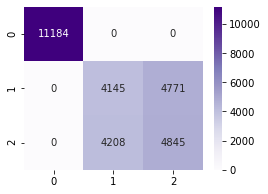

In [127]:
# confusion matrix
mat_knn1_test=confusion_matrix(data_test_y,y_pred_knn1_test)
confussion_matrix(mat_knn1_test)

In [128]:
# precision score, recall score, f1 score
print("precision_score_knn:",precision_score(data_test_y, y_pred_knn1_test,average='weighted')) 
print("recall_score_knn:",recall_score(data_test_y, y_pred_knn1_test,average='weighted'))
print("f1_score_knn:",f1_score(data_test_y, y_pred_knn1_test,average='weighted'))

precision_score_knn: 0.6918571188292004
recall_score_knn: 0.6920042534216032
f1_score_knn: 0.691627755217816


## XG

In [129]:
y_pred_xg1_test=XG1.predict(data_test_x)
accuracy_xg1_test=metrics.accuracy_score(data_test_y,y_pred_xg1_test)
accuracy_xg1_test

0.7025006002812747

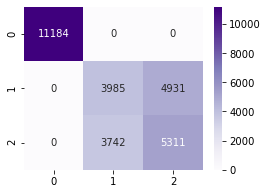

In [130]:
# confusion matrix
mat_xg1_test=confusion_matrix(data_test_y,y_pred_xg1_test)
confussion_matrix(mat_xg1_test)

In [131]:
# precision score, recall score, f1 score
print("precision_score_xg:",precision_score(data_test_y, y_pred_xg1_test,average='weighted')) 
print("recall_score_xg:",recall_score(data_test_y, y_pred_xg1_test,average='weighted'))
print("f1_score_xg:",f1_score(data_test_y, y_pred_xg1_test,average='weighted'))

precision_score_xg: 0.7023853024024815
recall_score_xg: 0.7025006002812747
f1_score_xg: 0.7010399875682946


## Random Forest

In [132]:
y_pred_forest1_test=forest1.predict(data_test_x)
accuracy_forest1_test=metrics.accuracy_score(data_test_y,y_pred_forest1_test)
accuracy_forest1_test

0.7116591774431448

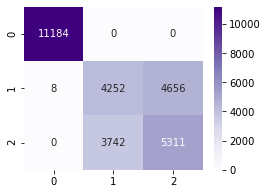

In [133]:
# confusion matrix
mat_forest1_test=confusion_matrix(data_test_y,y_pred_forest1_test)
confussion_matrix(mat_forest1_test)

In [134]:
# precision score, recall score, f1 score
print("precision_score_forest:",precision_score(data_test_y, y_pred_forest1_test,average='weighted')) 
print("recall_score_forest:",recall_score(data_test_y, y_pred_forest1_test,average='weighted'))
print("f1_score_forest:",f1_score(data_test_y, y_pred_forest1_test,average='weighted'))

precision_score_forest: 0.7115008376109232
recall_score_forest: 0.7116591774431448
f1_score_forest: 0.7107199555861905


## Logistic Regression

In [135]:
y_pred_lr1_test=lr1.predict(data_test_x)
accuracy_lr1_test=metrics.accuracy_score(data_test_y,y_pred_lr1_test)
accuracy_lr1_test

0.7698350084039378

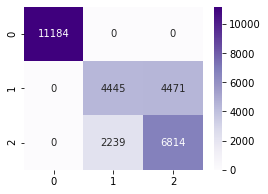

In [136]:
# confusion matrix
mat_lr1_test=confusion_matrix(data_test_y,y_pred_lr1_test)
confussion_matrix(mat_lr1_test)

In [137]:
# precision score, recall score, f1 score
print("precision_score_lr:",precision_score(data_test_y, y_pred_lr1_test,average='weighted')) 
print("recall_score_lr:",recall_score(data_test_y, y_pred_lr1_test,average='weighted'))
print("f1_score_lr:",f1_score(data_test_y, y_pred_lr1_test,average='weighted'))

precision_score_lr: 0.7745213874950245
recall_score_lr: 0.7698350084039378
f1_score_lr: 0.7659991225325891


## Adaboost

In [138]:
y_pred_ada_test=ada.predict(data_test_x)
accuracy_ada_test=metrics.accuracy_score(data_test_y,y_pred_ada_test)
accuracy_ada_test

0.7848591911638596

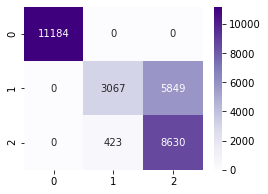

In [139]:
# confusion matrix
mat_ada_test=confusion_matrix(data_test_y,y_pred_ada_test)
confussion_matrix(mat_ada_test)

In [140]:
# precision score, recall score, f1 score
print("precision_score_lr:",precision_score(data_test_y, y_pred_ada_test,average='weighted')) 
print("recall_score_lr:",recall_score(data_test_y, y_pred_ada_test,average='weighted'))
print("f1_score_lr:",f1_score(data_test_y, y_pred_ada_test,average='weighted'))

precision_score_lr: 0.8374870775718991
recall_score_lr: 0.7848591911638596
f1_score_lr: 0.7626147740620668


## Vote

In [141]:
y_pred_vote1_test=vote1.predict(data_test_x)
accuracy_vote1_test=metrics.accuracy_score(data_test_y,y_pred_vote1_test)
accuracy_vote1_test

0.695983260727884

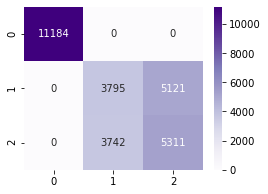

In [142]:
# confusion matrix
mat_vote1_test=confusion_matrix(data_test_y,y_pred_vote1_test)
confussion_matrix(mat_vote1_test)

In [143]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(data_test_y, y_pred_vote1_test,average='weighted')) 
print("recall_score_vote:",recall_score(data_test_y, y_pred_vote1_test,average='weighted'))
print("f1_score_vote:",f1_score(data_test_y, y_pred_vote1_test,average='weighted'))

precision_score_vote: 0.6957188129021167
recall_score_vote: 0.695983260727884
f1_score_vote: 0.6940007504097481


## Pipeline

In [144]:
y_pred_pipe_ada_test=pipe_ada.predict(data_test_x)
acuracy_pipe_ada_test=pipe_ada.score(data_test_x,data_test_y)
print(acuracy_pipe_ada_test)

# confusion matrix
print(confusion_matrix(data_test_y, y_pred_pipe_ada_test))

# precision score, recall score, f1 score
print("precision_score:",precision_score(data_test_y, y_pred_pipe_ada_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_pipe_ada_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_pipe_ada_test,average='weighted'))

0.7848591911638596
[[11184     0     0]
 [    0  3067  5849]
 [    0   423  8630]]
precision_score: 0.8374870775718991
recall_score: 0.7848591911638596
f1_score: 0.7626147740620668


In [145]:
y_pred_pipe_xg_test=pipe_xg.predict(data_test_x)
acuracy_pipe_xg_test=pipe_xg.score(data_test_x,data_test_y)
print(acuracy_pipe_xg_test)

# confusion matrix
print(confusion_matrix(data_test_y, y_pred_pipe_xg_test))

# precision score, recall score, f1 score
print("precision_score:",precision_score(data_test_y, y_pred_pipe_xg_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_pipe_xg_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_pipe_xg_test,average='weighted'))

0.7025006002812747
[[11184     0     0]
 [    0  3985  4931]
 [    0  3742  5311]]
precision_score: 0.7023853024024815
recall_score: 0.7025006002812747
f1_score: 0.7010399875682946


In [146]:
y_pred_pipe_knn_test=pipe_knn.predict(data_test_x)
acuracy_pipe_knn_test=pipe_knn.score(data_test_x,data_test_y)
print(acuracy_pipe_knn_test)

# confusion matrix
print(confusion_matrix(data_test_y, y_pred_pipe_knn_test))

# precision score, recall score, f1 score
print("precision_score:",precision_score(data_test_y, y_pred_pipe_knn_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_pipe_knn_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_pipe_knn_test,average='weighted'))

0.8790518986039173
[[11079    66    39]
 [    0  7576  1340]
 [    0  2081  6972]]
precision_score: 0.8811881386344234
recall_score: 0.8790518986039173
f1_score: 0.8792391522452625


In [147]:
y_pred_pipe_grb_test=pipe_grb.predict(data_test_x)
acuracy_pipe_grb_test=pipe_grb.score(data_test_x,data_test_y)
print(acuracy_pipe_grb_test)

# confusion matrix
print(confusion_matrix(data_test_y, y_pred_pipe_grb_test))

# precision score, recall score, f1 score
print("precision_score:",precision_score(data_test_y, y_pred_pipe_grb_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_pipe_grb_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_pipe_grb_test,average='weighted'))

0.6945082838815902
[[11184     0     0]
 [    0  3752  5164]
 [    0  3742  5311]]
precision_score: 0.6941985731294879
recall_score: 0.6945082838815902
f1_score: 0.6923948979976435


In [148]:
y_pred_pipe_forest_test=pipe_forest.predict(data_test_x)
acuracy_pipe_forest_test=pipe_forest.score(data_test_x,data_test_y)
print(acuracy_pipe_forest_test)

# confusion matrix
print(confusion_matrix(data_test_y, y_pred_pipe_forest_test))

# precision score, recall score, f1 score
print("precision_score:",precision_score(data_test_y, y_pred_pipe_forest_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_pipe_forest_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_pipe_forest_test,average='weighted'))

0.7116591774431448
[[11184     0     0]
 [    8  4252  4656]
 [    0  3742  5311]]
precision_score: 0.7115008376109232
recall_score: 0.7116591774431448
f1_score: 0.7107199555861905


In [149]:
y_pred_pipe_lr_test=pipe_lr.predict(data_test_x)
acuracy_pipe_lr_test=pipe_lr.score(data_test_x,data_test_y)
print(acuracy_pipe_lr_test)

# confusion matrix
print(confusion_matrix(data_test_y, y_pred_pipe_lr_test))

print("precision_score:",precision_score(data_test_y, y_pred_pipe_lr_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_pipe_lr_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_pipe_lr_test,average='weighted'))

0.8299660412307481
[[11184     0     0]
 [    0  5005  3911]
 [    0  1046  8007]]
precision_score: 0.8452276079590448
recall_score: 0.8299660412307481
f1_score: 0.8253067797761033


In [150]:
# changing the data type to int

y_pred_pipe_ada_test=y_pred_pipe_ada_test.astype(int)
y_pred_pipe_xg_test=y_pred_pipe_xg_test.astype(int)
y_pred_pipe_knn_test=y_pred_pipe_knn_test.astype(int)
y_pred_pipe_grb_test=y_pred_pipe_grb_test.astype(int)
y_pred_pipe_lr_test=y_pred_pipe_lr_test.astype(int)
y_pred_pipe_forest_test=y_pred_pipe_forest_test.astype(int)

In [151]:
y_pred_my_classifier_test=[]
for x in range(0,29153):
    if (y_pred_pipe_xg_test[x]==0):
        y_pred_my_classifier_test.append(y_pred_pipe_xg_test[x])
    
    elif(y_pred_pipe_lr_test[x]==1 ):
        y_pred_my_classifier_test.append(y_pred_pipe_lr_test[x])  
    
    elif(y_pred_pipe_ada_test[x]==1 ):
        y_pred_my_classifier_test.append(y_pred_pipe_ada_test[x]) 
    
    else:
        y_pred_my_classifier_test.append(y_pred_pipe_knn_test[x]) 

In [152]:
accuracy_class_test=metrics.accuracy_score(data_test_y, y_pred_my_classifier_test)
accuracy_class_test

0.8690014749768463

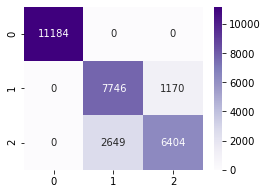

In [153]:
# confusion matrix
mat_class_test=confusion_matrix(data_test_y, y_pred_my_classifier_test)
confussion_matrix(mat_class_test)

In [154]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(data_test_y, y_pred_my_classifier_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_my_classifier_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_my_classifier_test,average='weighted'))

precision_score: 0.8740928824516891
recall_score: 0.8690014749768463
f1_score: 0.8681916923876524


# The best result I got is 87.9% using the pipeline with KNN.

### It classified the alone 100% coreect and had trouble classifiying the sych and spontan, but it mainly confused spontan with sync.